# Natural Language Processing 2

### Bugün bir GSM şirketine yazılım yapıyoruz. Gelen mesajların gerçek tanıdığımmız kişilerden mi yoksa reklam mı olduğunu anlayan bir yazılım

In [1]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 960F-0421

 Directory of C:\Users\ibrahim\Documents\Yapay Zeka\Day6

02.08.2025  11:16    <DIR>          .
30.07.2025  20:01    <DIR>          ..
02.08.2025  07:37    <DIR>          .ipynb_checkpoints
27.07.2025  07:43            58.226 amazon_cells_labelled.txt
27.07.2025  07:43             9.757 boszaman.docx
27.07.2025  07:42             3.876 challenge.txt
27.07.2025  07:42           959.319 en.yusufali.csv
02.08.2025  11:16            33.461 HamorSpam.ipynb
27.07.2025  07:44            85.285 imdb_labelled.txt
27.07.2025  11:22           785.751 Natural Language Processing Fetching.ipynb
02.08.2025  07:58         6.964.663 Natural Language Processing.ipynb
27.07.2025  07:43           115.093 nlp_example.pdf
27.07.2025  12:21           934.540 QuranDataset ZaferHoca.ipynb
27.07.2025  12:12           925.371 QuranDataset.ipynb
27.07.2025  07:44        82.161.571 reddit_worldnews_start_to_2016-11-22.csv
27.07.2025  07:44      

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('spam.csv')   # Bunun içinde özel karakterler var dolayısıyla hata verdi

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 606-607: invalid continuation byte

In [4]:
df=pd.read_csv('spam.csv', encoding='iso-8859-1')   # ingilizce ve türkçe karakterleri tanıyor

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
# ham tanıdıklardan gelen mesajlar, spam spam mesajları

In [7]:
import seaborn as sns

<AxesSubplot:xlabel='v1', ylabel='count'>

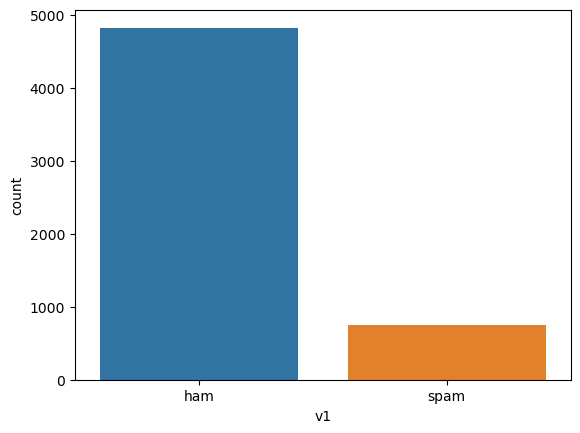

In [8]:
sns.countplot(x=df['v1'])   # ham ve spam adetlerini inceledik

In [9]:
df['v1'].value_counts()   #Adet sayılarını gördük


ham     4825
spam     747
Name: v1, dtype: int64

In [10]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)   # inplace true ile df = demeye gerek kalmadan siliyor

In [12]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.columns=['class','text']   #stün isimlerini değiştiriyoruz

In [14]:
df.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
# Bu kısmı tek başına yapan bir paket var(Bu madde madde yapılması gerekenleri)

In [16]:
import neattext as nfx

In [17]:
df['text']=df['text'].apply(nfx.normalize)     # Küçük harfe çevirir ve kelimeleri düzenler 

In [18]:
df.head()

,class,text
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in a wkly comp to win fa cup final...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


In [19]:
df.shape

(5572, 2)

In [20]:
s=' '.join(df['text'])   # Bütün yazıları birleştirdik

In [21]:
s

'go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat... ok lar... joking wif u oni... free entry in  a wkly comp to win fa cup final tkts  may . text fa to  to receive entry question(std txt rate)t&c\'s apply \'s u dun say so early hor... u c already then say... nah i don\'t think he goes to usf, he lives around here though freemsg hey there darling it\'s been  week\'s now and no word back! i\'d like some fun you up for it still? tb ok! xxx std chgs to send, å£. to rcv even my brother is not like to speak with me. they treat me like aids patent. as per your request \'melle melle (oru minnaminunginte nurungu vettam)\' has been set as your callertune for all callers. press * to copy your friends callertune winner!! as a valued network customer you have been selected to receivea å£ prize reward! to claim call . claim code . valid  hours only. had your mobile  months or more? u r entitled to update to the latest colour mobiles with c

In [22]:
s=nfx.clean_text(s)  # Veriyi temizliyor

In [23]:
s=nfx.remove_emails(s)  # email adreslerini siliyor

In [24]:
s=nfx.remove_special_characters(s)

In [25]:
s

'jurong point crazy available bugis n great world la e buffet cine got amore wat ok lar joking wif u oni free entry wkly comp win fa cup final tkts  text fa receive entry questionstd txt ratetcs apply s u dun early hor u c say nah think goes usf lives freemsg hey darling weeks word back id like fun still tb ok xxx std chgs send  rcv brother like speak me treat like aids patent request melle melle oru minnaminunginte nurungu vettam set callertune callers press  copy friends callertune winner valued network customer selected receivea  prize reward claim  claim code  valid hours only mobile months more u r entitled update latest colour mobiles camera free mobile update co free im gonna home soon want talk stuff anymore tonight k ive cried today chances win cash  pounds txt send  cost day   tsandcs apply reply hl info urgent week free membership  prize jackpot txt word claim no tc wwwdbuknet lccltd pobox ive searching right words thank breather promise wont help granted fulfil promise wond

In [26]:
# Datayı bu şekilde özel karakterlerden ve email adreslerinden temizledik

In [27]:
s=nfx.TextFrame(s)   # Dataframe gibi burda textframe yapıyoruz

In [28]:
# Sonrasında data hakkında bilgi alabiliriz

In [29]:
s.describe()

Key      Value          
Length  : 264774         
vowels  : 78171          
consonants: 138955         
stopwords: 2471           
punctuations: 0              
special_char: 0              
tokens(whitespace): 45164          
tokens(words): 45164          


In [30]:
s.length   # Boyutunu söylüyor

264774

In [31]:
s.head()

'juron'

In [32]:
s.head(50)

'jurong point crazy available bugis n great world l'

In [33]:
s.tail(20)

' gave free rofl true'

In [34]:
s.readability()   # Kaç yaş grubuna hitap ediyor onu söylüyor burda kelimelerin bilinirliği vs skala ile ölçüyor

{'automated readability': 23829.24233394195, 'description': None}

In [35]:
import nltk

In [36]:
nltk.download('gutenberg')   # Klasiklerin kütüphanesi

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\ibrahim\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [37]:
nltk.corpus.gutenberg.fileids()  #1. si yazarın adı 2. si kitabın adı

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [38]:
seyhpir=nltk.corpus.gutenberg.raw('shakespeare-hamlet.txt')

In [39]:
seyhpir

"[The Tragedie of Hamlet by William Shakespeare 1599]\n\n\nActus Primus. Scoena Prima.\n\nEnter Barnardo and Francisco two Centinels.\n\n  Barnardo. Who's there?\n  Fran. Nay answer me: Stand & vnfold\nyour selfe\n\n   Bar. Long liue the King\n\n   Fran. Barnardo?\n  Bar. He\n\n   Fran. You come most carefully vpon your houre\n\n   Bar. 'Tis now strook twelue, get thee to bed Francisco\n\n   Fran. For this releefe much thankes: 'Tis bitter cold,\nAnd I am sicke at heart\n\n   Barn. Haue you had quiet Guard?\n  Fran. Not a Mouse stirring\n\n   Barn. Well, goodnight. If you do meet Horatio and\nMarcellus, the Riuals of my Watch, bid them make hast.\nEnter Horatio and Marcellus.\n\n  Fran. I thinke I heare them. Stand: who's there?\n  Hor. Friends to this ground\n\n   Mar. And Leige-men to the Dane\n\n   Fran. Giue you good night\n\n   Mar. O farwel honest Soldier, who hath relieu'd you?\n  Fra. Barnardo ha's my place: giue you goodnight.\n\nExit Fran.\n\n  Mar. Holla Barnardo\n\n   Bar. 

In [40]:
seyhpir=nfx.TextFrame(seyhpir)   #Data frame gibi textframe çevirdik

In [41]:
seyhpir.readability()   # Kimlere uygun

{'automated readability': 12.990613823318782,
 'description': '18-24 years (College student)'}

In [42]:
alice=nltk.corpus.gutenberg.raw('carroll-alice.txt')

In [43]:
alice=nfx.TextFrame(alice)

In [44]:
alice.readability()

{'automated readability': 18.38055794171712, 'description': None}

In [45]:
df['text']=df['text'].str.replace('[^\w\s]','',regex=True)  # Noktalama işaretlerini kaldır
df['text']=df['text'].str.replace('\d+','',regex=True)       # Rakamları kaldır
df['text']=df['text'].str.replace('\n','',regex=True)        # Satır sonlarını kaldır
df['text']=df['text'].str.replace('\r','',regex=True)        # Entera basılan yerleri kaldır

<AxesSubplot:xlabel='class', ylabel='count'>

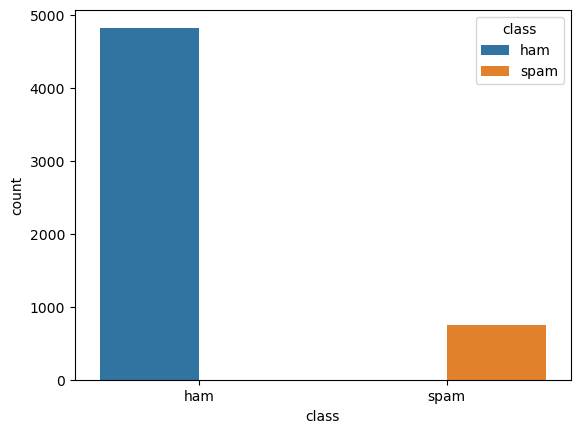

In [46]:
sns.countplot(x=df['class'],hue=df['class'])

In [47]:
# imbalanced SMOTE dengesiz datalarda az olan verileri arttırıyor ve balance yapmış oluyor text ve herhangi bi dataya göre yapar

In [48]:
# Sentetik datadır bir simülasyon datasıdır. Burda spam data yeni mesaj gönderseydi ne gönderirdi bunu tahmin edip dolduruyor

In [49]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [50]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from collections import Counter

# Create a sample imbalanced dataset
X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.9, 0.1], n_informative=3,
                           n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=1000, random_state=42)

print("Original dataset shape:", Counter(y))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Resampled dataset shape:", Counter(y_resampled))

Original dataset shape: Counter({0: 900, 1: 100})
Resampled dataset shape: Counter({0: 900, 1: 900})


In [51]:
x=df['text']
y=df['class']

In [52]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer   # Yazıyı vektöre çevirir

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
# Bu bir Classification projesi sebebi Spam mı değil mi old. için RandomForestClassifier çağırdık

In [55]:
# PipeLine eğittiğim data örnk 50bin kelime fakat yeni gelen kelime 5 taneden oluşuyor burda boyutlar farklı old. için sıkıntı olacak bu sebeple pipeline ile boyutları aynı yapıyor
# Yapılacak işleri sıralı yapar ve boyut problemi çözer

In [56]:
from sklearn.pipeline import Pipeline

In [57]:
clf=Pipeline([('tfidf',TfidfVectorizer()),('Classifier',RandomForestClassifier())])

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.2)

In [60]:
clf.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('Classifier', RandomForestClassifier())])

In [61]:
tahmin=clf.predict(x_test)

In [62]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [63]:
accuracy_score(tahmin,y_test)   # %97 oranında öğrendi

0.9721973094170404

In [64]:
print(classification_report(tahmin,y_test))  # precision değeri tahminin doğruluğunu gösteren değer

              precision    recall  f1-score   support

         ham       1.00      0.97      0.98       996
        spam       0.79      1.00      0.88       119

    accuracy                           0.97      1115
   macro avg       0.90      0.98      0.93      1115
weighted avg       0.98      0.97      0.97      1115



In [65]:
confusion_matrix(tahmin,y_test)  #965-116 doğru tahmin 34-0 yanlış tahmin

array([[965,  31],
       [  0, 119]], dtype=int64)

In [66]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [67]:
from sklearn.svm import SVC   # SVC C Classifer paketini indirdik Support vector machine

In [68]:
svm=Pipeline([('tfidf',TfidfVectorizer()),('Classifier',SVC())])

In [69]:
svm.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('Classifier', SVC())])

In [70]:
tahmin2=svm.predict(x_test)

In [71]:
accuracy_score(tahmin2,y_test)

0.979372197309417

In [72]:
# En az bu şekilde 3 modeli denememiz gerekiyor bütün modellerde

In [73]:
confusion_matrix(tahmin2,y_test)

array([[965,  23],
       [  0, 127]], dtype=int64)

In [74]:
print(classification_report(tahmin2,y_test))

              precision    recall  f1-score   support

         ham       1.00      0.98      0.99       988
        spam       0.85      1.00      0.92       127

    accuracy                           0.98      1115
   macro avg       0.92      0.99      0.95      1115
weighted avg       0.98      0.98      0.98      1115



<AxesSubplot:>

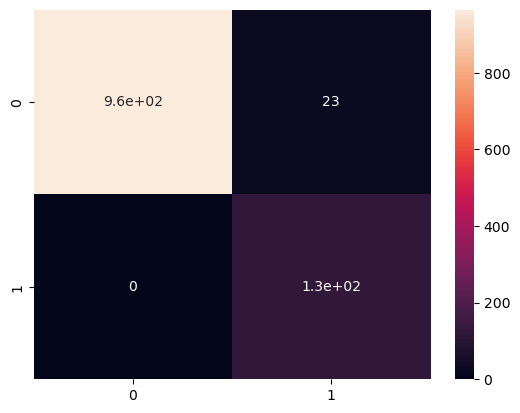

In [75]:
sns.heatmap(confusion_matrix(tahmin2,y_test),annot=True)

In [76]:
test1=['Hello, you are learning Natural Language Processing']
test2=['Congratulations, you won a lottary ticket, to claim call 1-800-899-999']
test3=['Click here to claim your $1 million']

In [77]:
clf.predict(test1)

array(['ham'], dtype=object)

In [78]:
clf.predict(test2)

array(['spam'], dtype=object)

In [79]:
clf.predict(test3)

array(['ham'], dtype=object)

In [80]:
svm.predict(test1)

array(['ham'], dtype=object)

In [81]:
svm.predict(test2)

array(['spam'], dtype=object)

In [82]:
svm.predict(test3)

array(['spam'], dtype=object)

In [83]:
# Model hazır artık türkcelle gönderebiliriz Eğitilen model kaydedip yeniden kullanma

In [84]:
import joblib 

In [85]:
joblib.dump(svm,'svm_tm_hs.pkl')

['svm_tm_hs.pkl']

In [86]:
# Bu savlenen dosyası türkcele gönderdim iş bitti

In [87]:
loaded_model=joblib.load('svm_tm_hs.pkl')       # Türkcelde bunu yapıyor 

In [88]:
loaded_model.predict(test1)

array(['ham'], dtype=object)

## Huggingface.co sitesinde eğitilmiş modeller var bunları kullanabilirsin

In [89]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [90]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [91]:
def wc(data,color):
    plt.figure(figsize=(10,10))
    wc=WordCloud(background_color=color, stopwords=STOPWORDS)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')           

In [92]:
spam=df[df['class']=='spam']  # spam mesajlarını ayırmış oluyor
ham=df[df['class']=='ham']

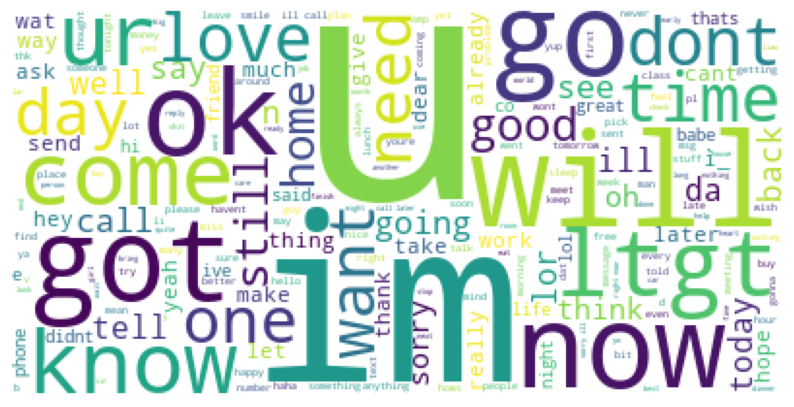

In [93]:
wc(ham['text'],'white')

In [95]:
pip install stylecloud

     ------------------------------------ 262.1/262.1 kB 283.0 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 161.4/161.4 kB 1.6 MB/s eta 0:00:00
     ------------------------------------ 332.3/332.3 kB 897.0 kB/s eta 0:00:00
     ---------------------------------------- 87.2/87.2 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for stylecloud: filename=stylecloud-0.5.2-py3-none-any.whl size=259493 sha256=13d4ea7e812e985a0b1288a4aff634c8545db4761253d0c5b5026a56b33759bf
  Stored in directory: c:\users\ibrahim\appdata\local\pip\cache\wheels\c5\8e\e8\d4fa02f02bc4eea452ff7722f5166d84b41d0c465beeed67cf
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114247 sha256=d0718090526123e93ecaab4f2ecab8d705dd0325e4acf63f22ed1bd735bb0e0a
  Stored in directory: c:\users\ibrahim

In [97]:
pip install pillow==9.5.0

     ---------------------------------------- 2.5/2.5 MB 1.2 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.2.0
    Uninstalling Pillow-9.2.0:
      Successfully uninstalled Pillow-9.2.0
Note: you may need to restart the kernel to use updated packages.


In [98]:
import stylecloud as sc

In [99]:
import matplotlib.pyplot as plt

In [100]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 960F-0421

 Directory of C:\Users\ibrahim\Documents\Yapay Zeka\Day6

02.08.2025  11:35    <DIR>          .
30.07.2025  20:01    <DIR>          ..
02.08.2025  07:37    <DIR>          .ipynb_checkpoints
27.07.2025  07:43            58.226 amazon_cells_labelled.txt
27.07.2025  07:43             9.757 boszaman.docx
27.07.2025  07:42             3.876 challenge.txt
27.07.2025  07:42           959.319 en.yusufali.csv
02.08.2025  11:35         1.372.389 HamorSpam.ipynb
27.07.2025  07:44            85.285 imdb_labelled.txt
27.07.2025  11:22           785.751 Natural Language Processing Fetching.ipynb
02.08.2025  07:58         6.964.663 Natural Language Processing.ipynb
27.07.2025  07:43           115.093 nlp_example.pdf
27.07.2025  12:21           934.540 QuranDataset ZaferHoca.ipynb
27.07.2025  12:12           925.371 QuranDataset.ipynb
27.07.2025  07:44        82.161.571 reddit_worldnews_start_to_2016-11-22.csv
27.07.2025  07:44      

In [101]:
sc.gen_stylecloud(file_path='challenge.txt',output_name='ch1.png')

In [102]:
# Burda şekli belirleme işlemlerini yaptık

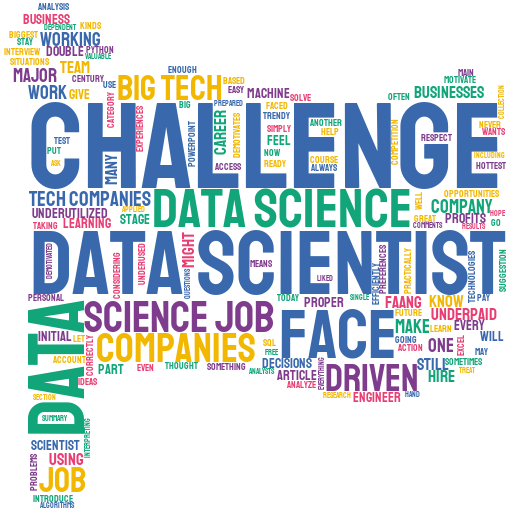

In [103]:
from IPython.display import Image
Image(filename='ch1.png')

In [104]:
sc.gen_stylecloud(file_path='challenge.txt',icon_name='fas fa-car',output_name='ch2.png')

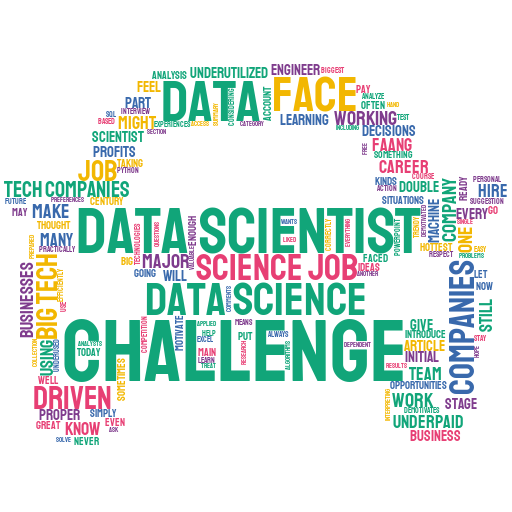

In [105]:
from IPython.display import Image
Image(filename='ch2.png')

In [106]:
# En çok geçen kelimeleri resme giydirmiş oluyor

In [111]:
sc.gen_stylecloud(file_path='challenge.txt',icon_name='fas fa-star-and-crescent',output_name='ch3.png',background_color='red',colors='white')

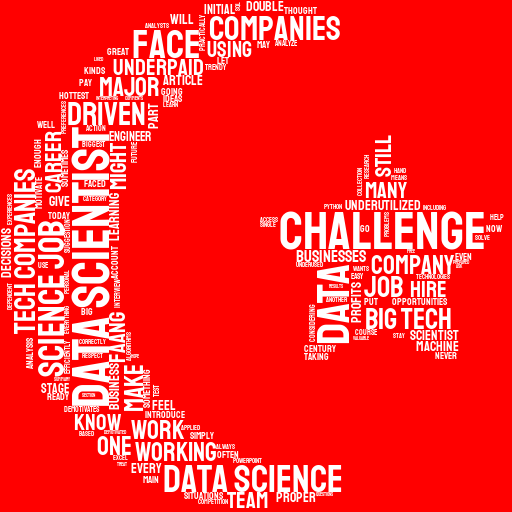

In [112]:
from IPython.display import Image
Image(filename='ch3.png')

In [113]:
sc.gen_stylecloud(file_path='challenge.txt',icon_name='fas fa-truck',output_name='ch4.png')

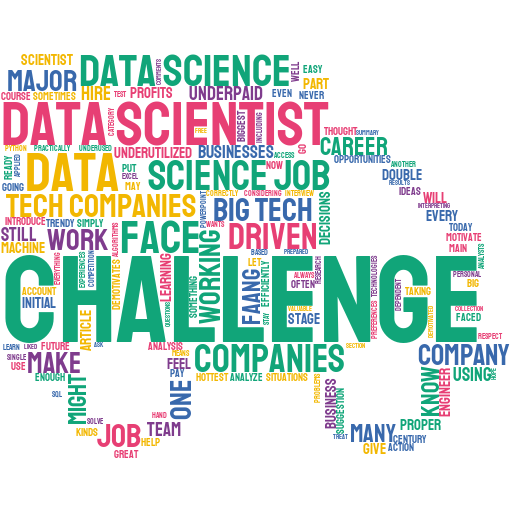

In [114]:
from IPython.display import Image
Image(filename='ch4.png')

In [115]:
sc.gen_stylecloud(file_path='challenge.txt',icon_name='fas fa-fighter-jet',output_name='ch5.png')


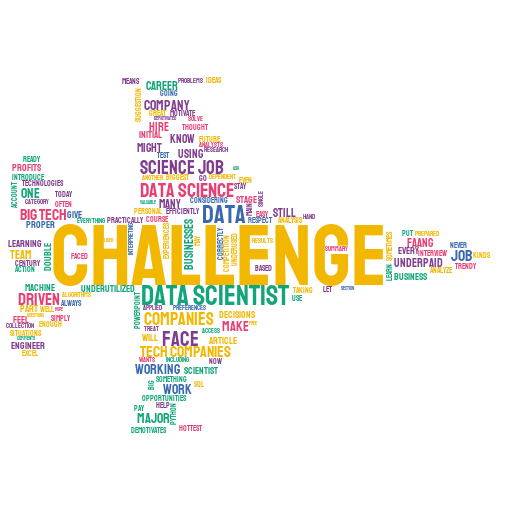

In [116]:
from IPython.display import Image
Image(filename='ch5.png')

In [117]:
sc.gen_stylecloud(file_path='challenge.txt',icon_name='fas fa-heart',output_name='ch6.png')


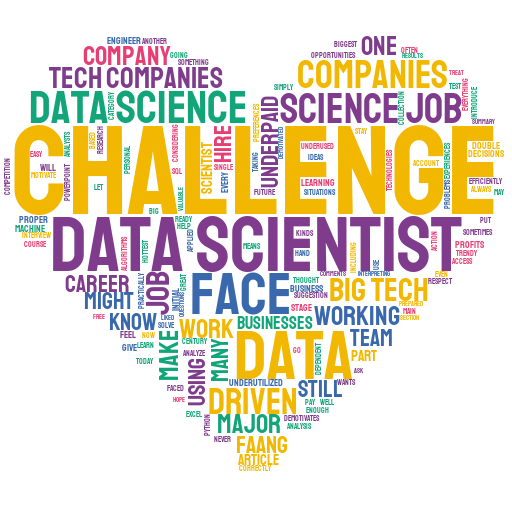

In [118]:
from IPython.display import Image
Image(filename='ch6.png')

In [119]:
#fontawesome.com dan şekillerin kodunu alabilirsin

In [122]:
def wc2(data):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open('cloud.png'))
    wc=WordCloud(stopwords=STOPWORDS,mask=mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')           

In [123]:
wc2(ham['text'])

AttributeError: type object 'Image' has no attribute 'open'

<Figure size 1000x1000 with 0 Axes>

# Sentiment Analysis 

In [124]:
df['text'][2]

'free entry in  a wkly comp to win fa cup final tkts  may  text fa to  to receive entry questionstd txt ratetcs apply s'

In [125]:
# Burda yazıların negatif mi pozitif mi yorum olduğunu anlamaya çalışıyoruz

In [126]:
# polarity  -1 se aşırı negatif 0 nötr 1 aşırı pozitif, subjectivity: Değeri 0,1 arasında değişir 0 sa objective 1 se subjective

In [127]:
text1='I love programming and AI'

In [128]:
from textblob import TextBlob

In [129]:
blob=TextBlob(text1)

In [130]:
blob.sentiment   #Subjective oldu

Sentiment(polarity=0.5, subjectivity=0.6)

In [131]:
text2='I hate programming and AI'

In [132]:
blob=TextBlob(text2)

In [133]:
blob.sentiment

Sentiment(polarity=-0.8, subjectivity=0.9)

In [134]:
blob.sentiment.polarity

-0.8

In [135]:
blob.sentiment.subjectivity

0.9